<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW6_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
df = california_housing.frame

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# **2. Проведите первичный анализ.**

**a.Проверьте данные на пропуски. Удалите в случае обнаружения.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**b.*Нормализуйте один из признаков.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
HouseAge_scaled  = scaler.fit_transform(df[['HouseAge']])

In [ ]:
df['HouseAge_scaled'] = HouseAge_scaled

In [ ]:
df = df.drop(['HouseAge'], axis=1)

In [ ]:
df.head()

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAge_scaled
0,8.3252,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.784314
1,8.3014,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.392157
2,7.2574,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.000000
3,5.6431,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.000000
4,3.8462,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.000000


# **3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['MedHouseVal'], axis=1)

In [ ]:
y = df['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Обучите модель регрессии на обучающем множестве.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

# **5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [ ]:
model.score(X_test, y_test)

0.575787706032451

# **6. Обучите дерево решений на обучающем множестве.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**a. Повторите п. 5 для полученной модели.**

In [ ]:
clf.score(X_test, y_test)

0.6195548945731926

**b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.**

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Дерево решений регрессии для задачи определения медианной стоимости дома в Калифорнии')

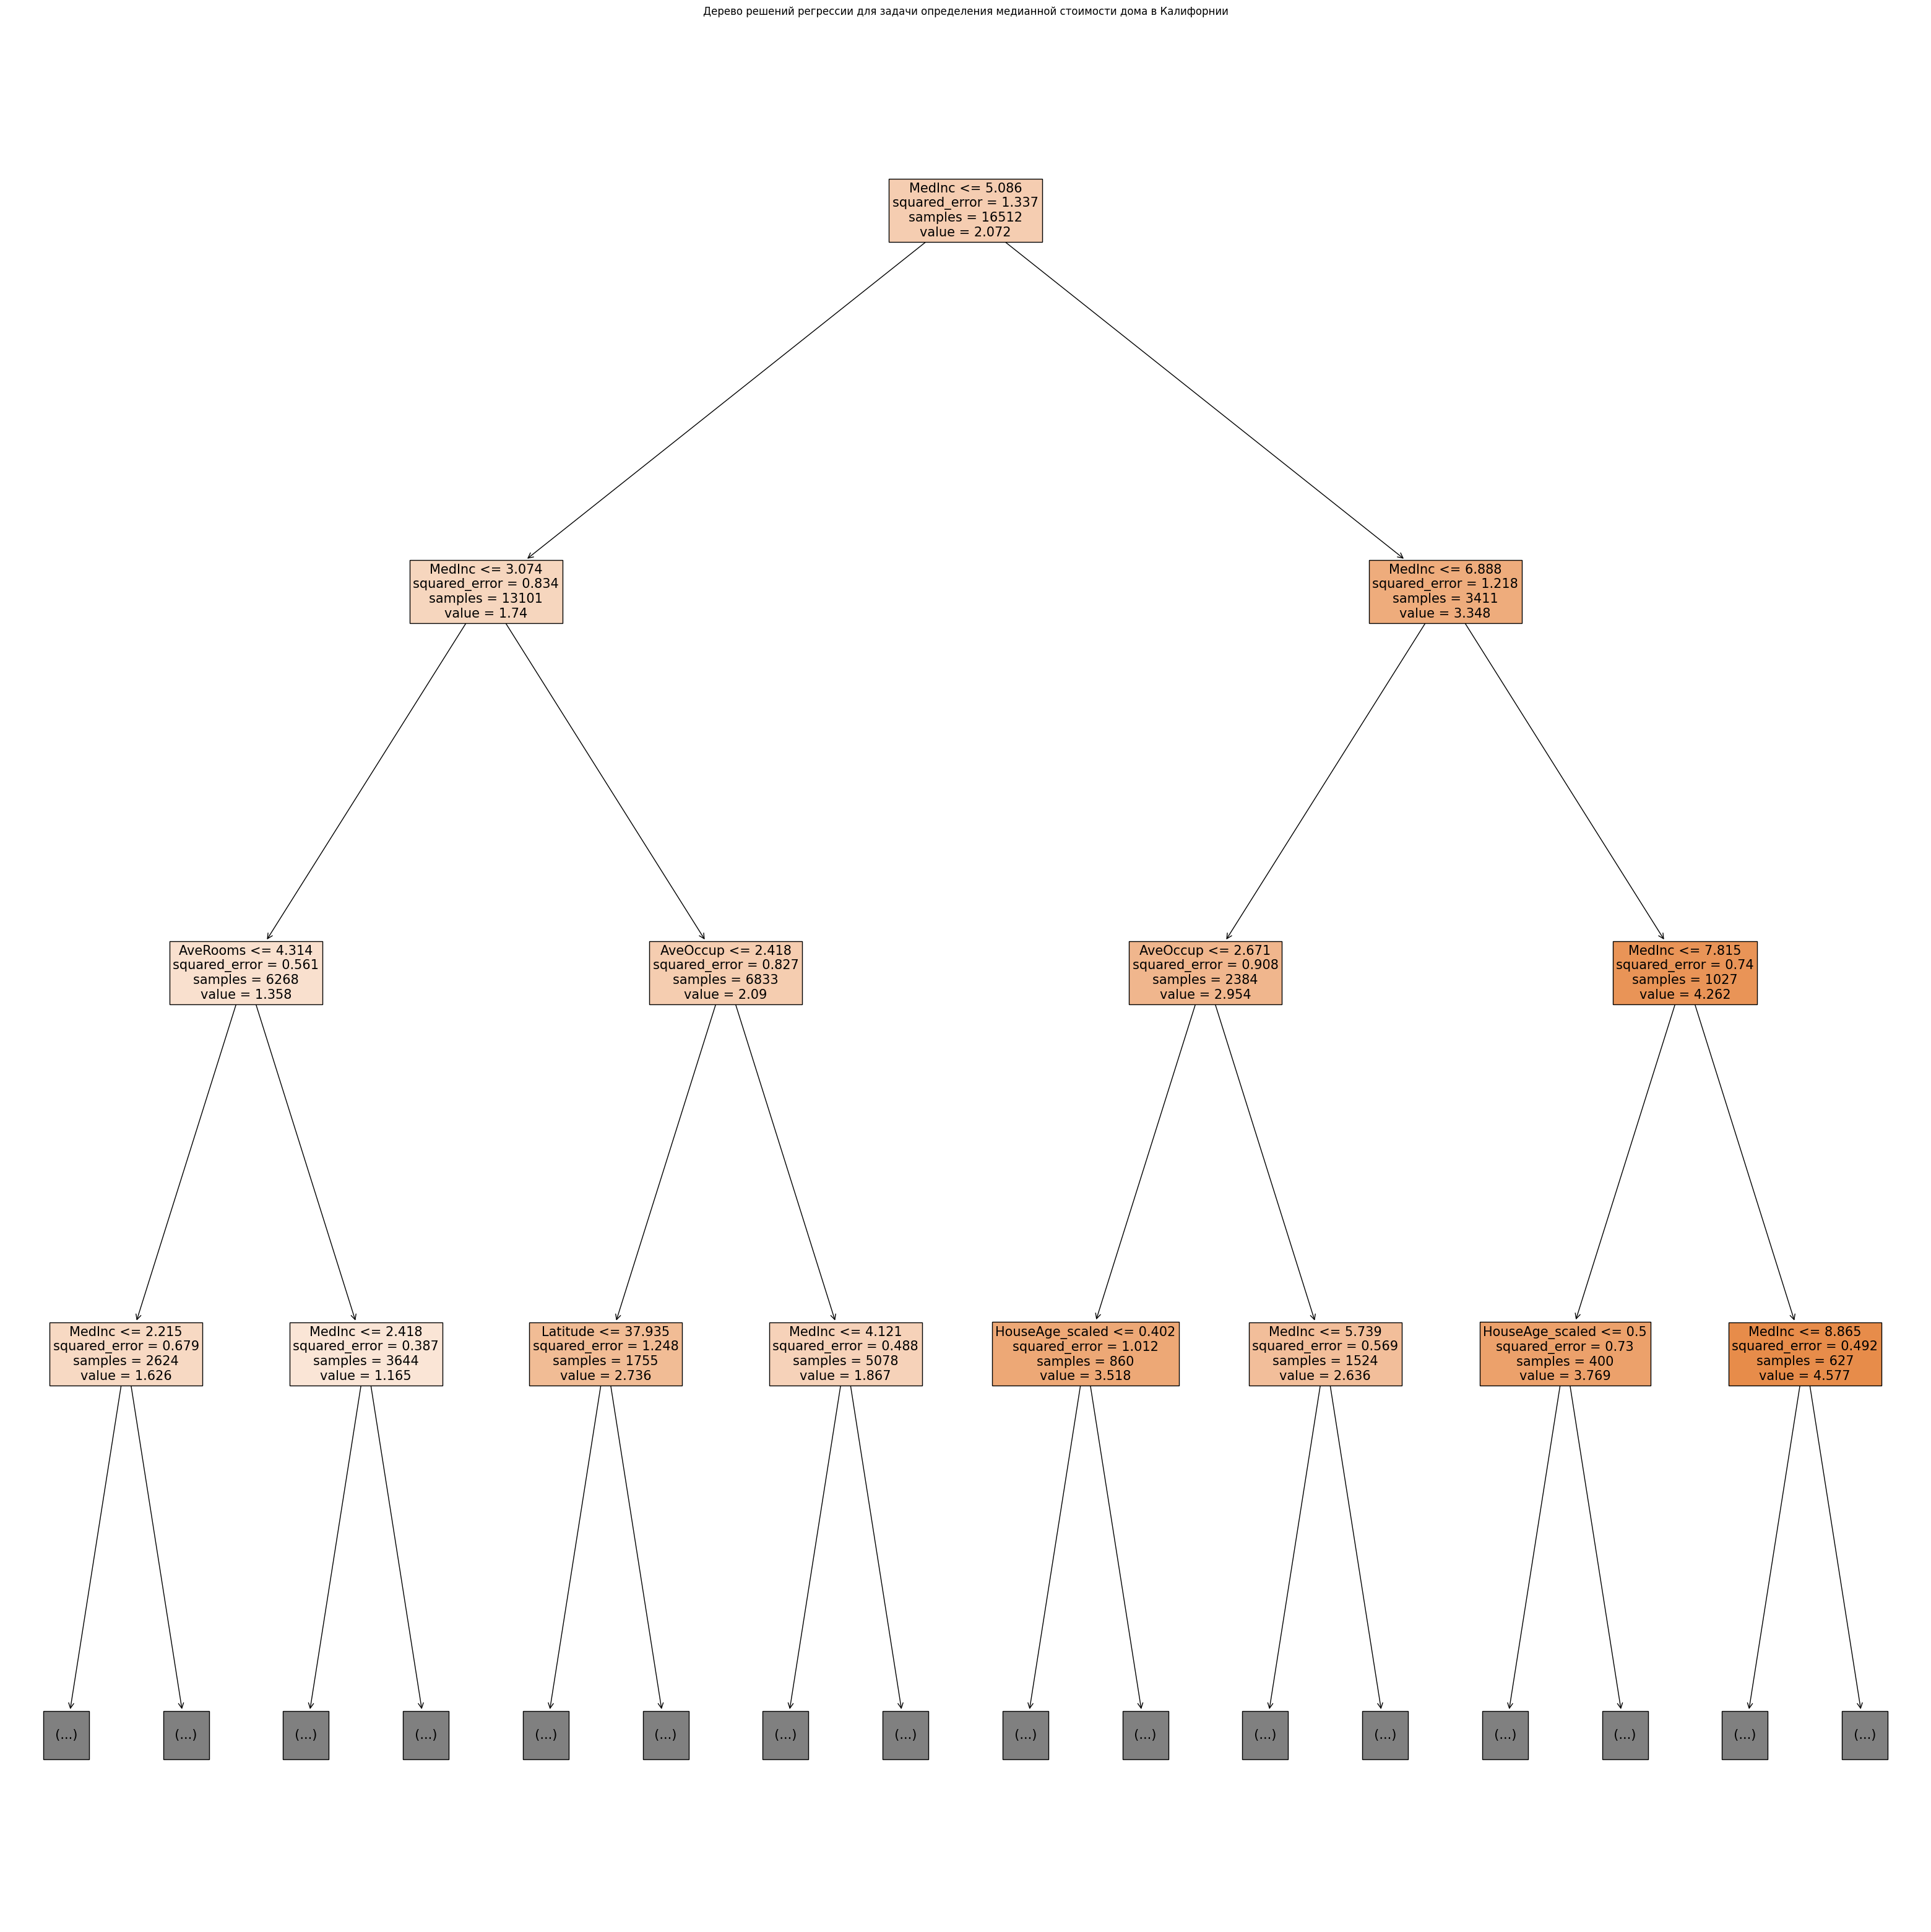

In [ ]:
plt.figure(figsize=(40, 40))
plot_tree(clf, max_depth = 3, feature_names=X.columns, fontsize = 15, filled=True);
plt.title("Дерево решений регрессии для задачи определения медианной стоимости дома в Калифорнии")

# **7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.**

In [ ]:
clf1 = DecisionTreeRegressor(max_depth = 10, criterion= 'squared_error', random_state=42)

In [ ]:
clf1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
clf1.score(X_test, y_test)

0.6798162959455598

# **8. Сформулируйте выводы по проделанной работе.**

**a. Сравните точность двух моделей.**

Самая низкая точность в рамках задачи у обычной линейно регрессии.

Самая высокая точность у дерева со всеми оптимизациями


**b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?**

- когда есть множество количественных переменных с разной размерностью
- для относительно небольших задач, где требуется наглядно донести заказчику как сработала модель
- c обилием категориальных переменных

